# Project: No Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Project to analysis the data set for medical appointments in Brazil using 100K dataset

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, to load the data, check for cleanliness, and then trim and clean the dataset for analysis.


#### Importing modules & Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#% matplotlib inline
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv');
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### General Properties

#### Show Number of columns & rows

In [2]:
df.shape

(110527, 14)

#### Get general statistics

In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Visualize Data

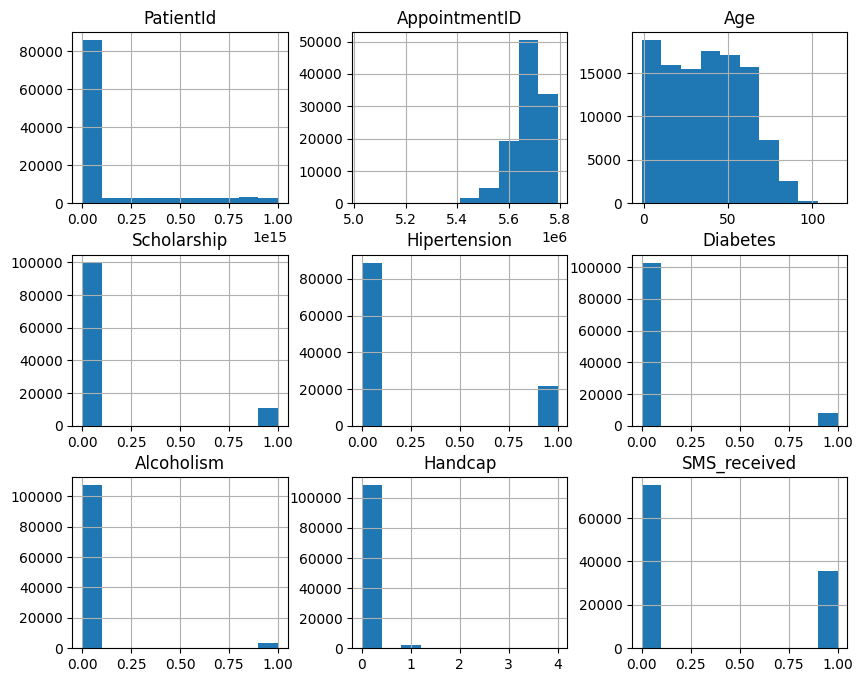

In [5]:
df.hist(figsize=(10,8));

### Data Cleaning

#### Remove Unusual value for age

In [6]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
df.drop(df.index[99832], inplace=True)

#### Convert String to Int in No-show column

In [8]:
df.replace({'No-show': {'Yes': 1, 'No': 0}}, inplace= True)
df['No-show'] = df['No-show'].astype(int)


#### Check for null values

In [9]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Drop unused Columns

In [10]:
df.drop(['AppointmentID'], axis = 1, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Explore relationship between SMS Received and No show
#### Initail exploration showed a high number of patients that didn't recieve SMS which might indicate that there's a relationship between no show and sms recieved


In [11]:
df.groupby(["No-show", "SMS_received"]).size()

No-show  SMS_received
0        0               62509
         1               25698
1        0               12535
         1                9784
dtype: int64

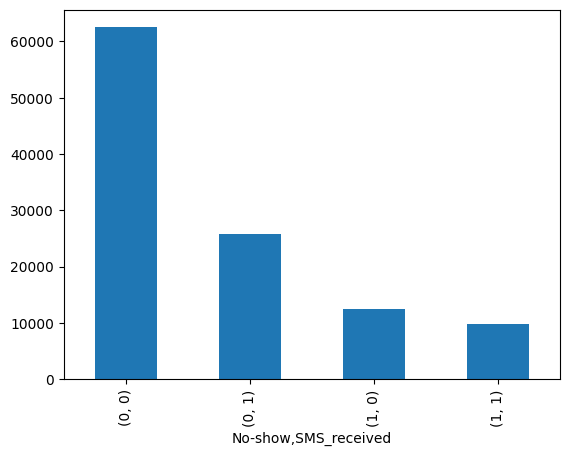

In [12]:
df.groupby(["No-show", "SMS_received"]).size().plot(kind= 'bar');

##### Summary
Looks Like SMS Recieved didn't influence the behaviour of no-show 

### Research Question 2  (Replace this header name!)

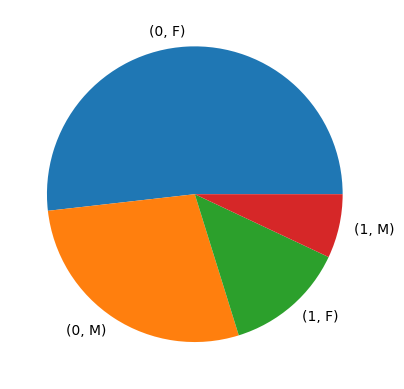

In [17]:
df.groupby(['No-show','Gender']).size()
df.groupby(['No-show','Gender']).size().plot(kind= 'pie');


At first glance looks like Females are more likely to show up, However, the size of each gender should be taking into account

/tmp/ipykernel_16488/3062221016.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Gender']).mean()
/tmp/ipykernel_16488/3062221016.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Gender', 'No-show']).mean().plot(kind= 'bar');


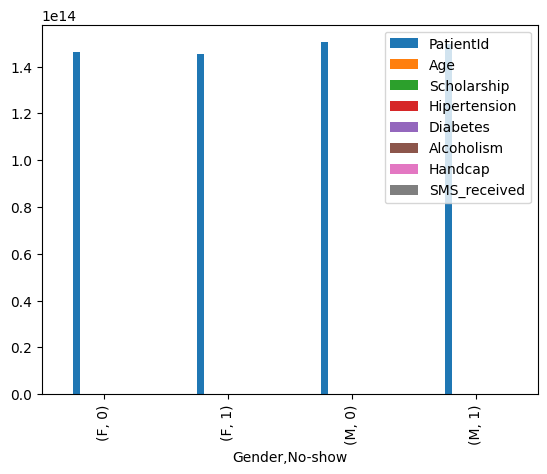

In [21]:
df.groupby(['Gender']).mean()
df.groupby(['Gender', 'No-show']).mean().plot(kind= 'bar');

By Looking at the average compared to the group size, turns out that the gender also didn't affect the No-show 
Both Groups has almost same precentage, with females have a slight edge

<a id='conclusions'></a>
## Conclusions

> In Summary, Looks like females have a slight edge over males to show up.
> However, SMS Recieved doesn't correlate with the no-showing-up 
